# Exploratory Data Analysis

In [1]:
# Import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data.
df =pd.read_excel(r'C:\Users\KUNAL\Desktop\insurance.xlsx')

In [3]:
# Look at first five rows of data.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
# Check the null values.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188454E7310>,
      dtype=object)

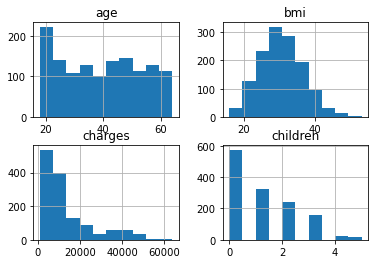

In [6]:
# Hisogram of some of the independent variables
df[['age','bmi','charges','children']].hist()

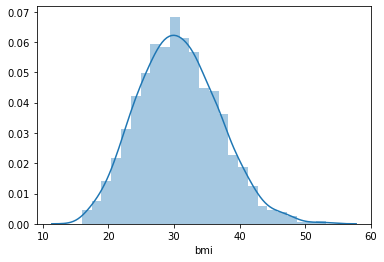

In [7]:
den1=sns.distplot(df['bmi'])

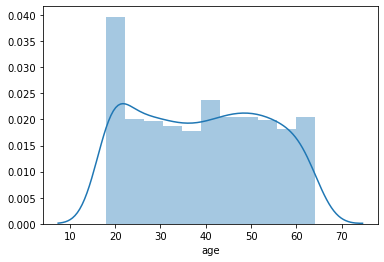

In [8]:
den2=sns.distplot(df['age'])

Text(0.5, 1.0, 'Distribution of Charges')

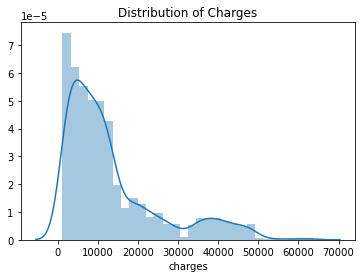

In [9]:
den3=sns.distplot(df['charges'])
plt.title("Distribution of Charges")

### From the above density plot we can say that the distribution of charges are positively skewed.

Text(0.5, 1.0, 'Boxplot for Charges of Smoker')

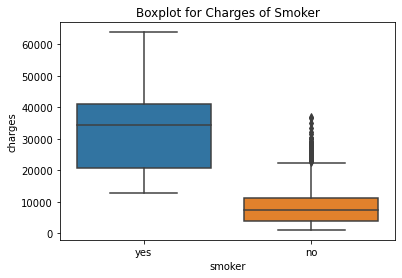

In [10]:
bxplt=sns.boxplot(x="smoker",y='charges',data=df)
plt.title("Boxplot for Charges of Smoker")

### From the above boxplot we can say that the mean value of charges for non smoker are less than mean value of charges of smoker

Text(0.5, 1.0, 'Boxplot of Regions')

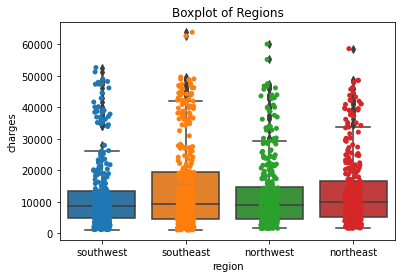

In [11]:
sns.boxplot(x="region",y="charges",data=df)
sns.stripplot(x="region",y="charges",data=df)
plt.title("Boxplot of Regions")

### We can see that southeast region has the highest mean charges while mean charges for the rest are not much of a difference from each other.

Text(0.5, 1.0, 'Boxplot for Charges of Smoker sexwise')

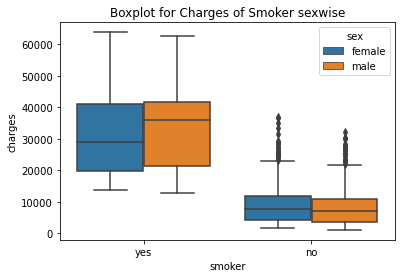

In [12]:
bxplt=sns.boxplot(x="smoker",y='charges',hue="sex",data=df)
plt.title("Boxplot for Charges of Smoker sexwise")

### Mean value of charges for female smokers are slightly less than that of men smokers.

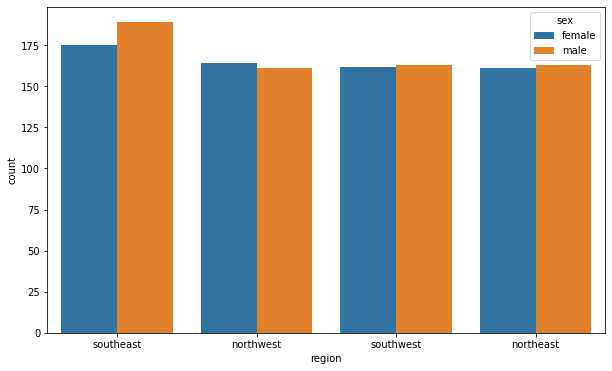

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='region',order=df['region'].value_counts(ascending=False).index,hue='sex')

### From the above plot we can say the most number of customers belongs to southeast region and this region also has the most number of male & female customer

Text(0.5, 1.0, 'Number of Males & Females')

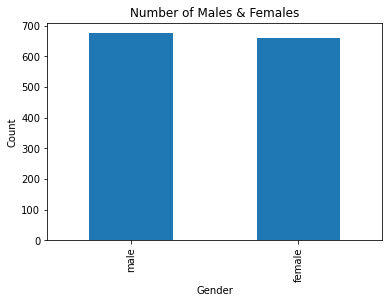

In [14]:
barplot=df['sex'].value_counts(ascending=False).plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Number of Males & Females")

Text(0.5, 1.0, 'Number of Smokers')

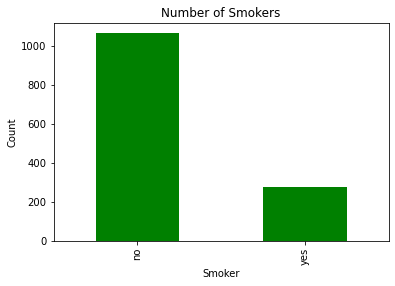

In [15]:
barplot2=df['smoker'].value_counts(ascending=False).plot(kind='bar', color="green")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.title("Number of Smokers")

Text(0.5, 1.0, 'Number of People with Children')

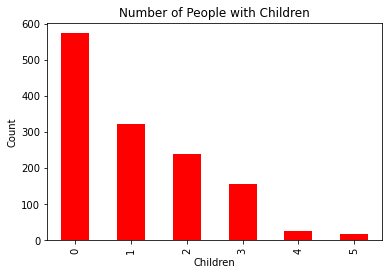

In [16]:
barplot4=df['children'].value_counts(ascending=False).plot(kind='bar', color="red")
plt.xlabel("Children")
plt.ylabel("Count")
plt.title("Number of People with Children")

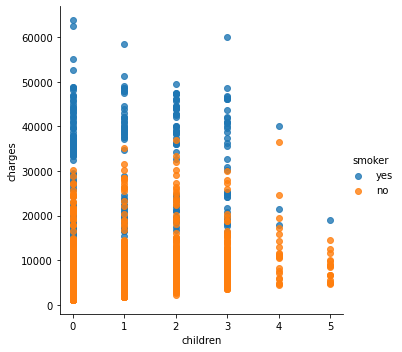

In [17]:
sns.lmplot(data=df, x="children",y="charges", fit_reg=False,hue='smoker')

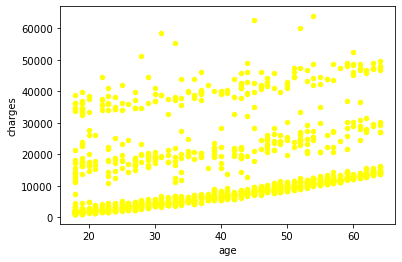

In [18]:
df.plot(kind='scatter',x='age',y='charges',color='yellow')

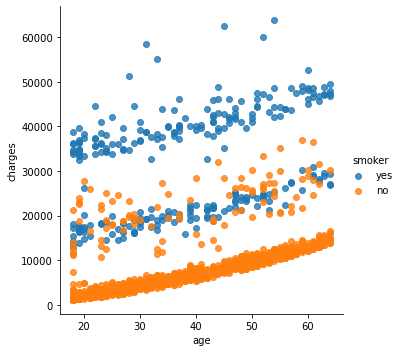

In [19]:
sns.lmplot(data=df, x="age",y="charges", fit_reg=False,hue="smoker")

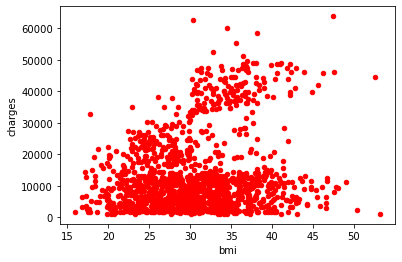

In [20]:
df.plot(kind='scatter',x='bmi',y='charges',color='red')

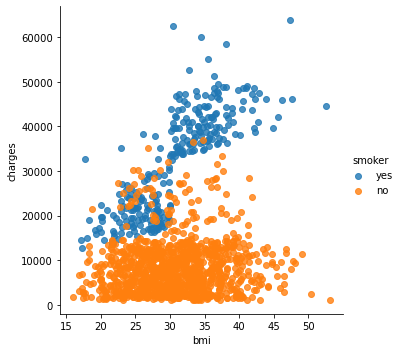

In [21]:
sns.lmplot(data=df, x="bmi",y="charges", fit_reg=False,hue="smoker")

 One way to view all relationship first and get an overview on our data is to use pairplot.

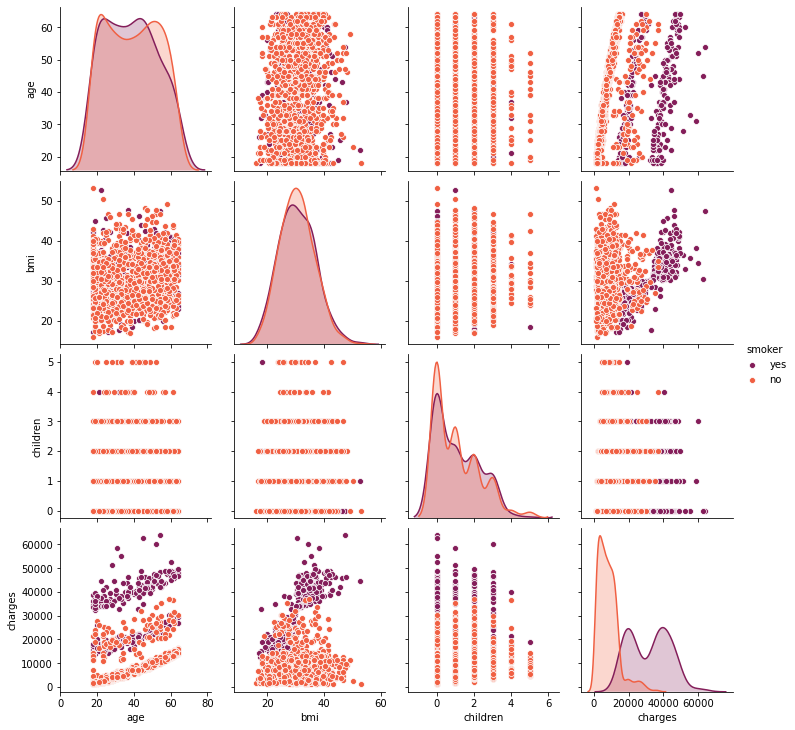

In [22]:
sns.pairplot(df, palette="rocket",hue="smoker")

# Overall Conclusion
## From Histogram we can say that
### 1.  Age follows Uniform Distribution
### 2.  BMI of all customers are symmetrically distributed
### 3.  The distribution of charges is positively skewed
## From Boxplot we can say that
###  1.  The mean value of charges for non smokers are less than mean value of charges of   smokers
###  2.  Southeast region has the highest mean charges while mean charges for the rest are not much of a difference from each other.
###  3.Mean value of charges for female smokers are slightly less than that of men smokers.
## From scatter plot we can say that
### 1. As age increases charges also increases

### Feature Engineering

In [23]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(df['sex'])
df['sex']=label.transform(df['sex'])
label.fit(df['smoker'])
df['smoker']=label.transform(df['smoker'])
label.fit(df['region'])
df['region']=label.transform(df['region'])

### Correlation Plot

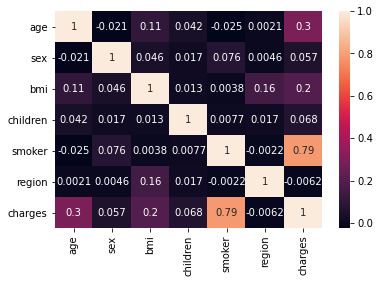

In [24]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr,annot=True)

### Important Features

### The most effective factor is smoking followed by bmi & age

# Model Building

## Multiple Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
X= df.drop(['charges'],axis=1)
y= df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [28]:
lin_reg.coef_

array([  253.99185244,   -24.32455098,   328.40261701,   443.72929547,
       23568.87948381,  -288.50857254])

In [29]:
lin_reg.intercept_

-11661.983908824435

In [30]:
score1=lin_reg.score(X_test,y_test)

In [31]:
y_test_pred=lin_reg.predict(X_test)

In [32]:
mse1=metrics.mean_squared_error(y_test,y_test_pred)

## Light Gradient Boosting Machine Regression

In [33]:
from lightgbm import LGBMRegressor

In [34]:
lgbmreg=LGBMRegressor()

In [35]:
lgbmreg.fit(X_train,y_train)

LGBMRegressor()

In [36]:
score2=lgbmreg.score(X_test,y_test)

In [37]:
y_test_pred=lgbmreg.predict(X_test)

In [38]:
mse2=metrics.mean_squared_error(y_test,y_test_pred)

## Extreme Gradient Boosting Regression

In [39]:
from xgboost import XGBRegressor

In [40]:
xgbreg=XGBRegressor()

In [41]:
xgbreg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
score3=xgbreg.score(X_test,y_test)

In [43]:
y_test_pred=xgbreg.predict(X_test)

In [44]:
mse3=metrics.mean_squared_error(y_test,y_test_pred)

## Histogram Gradient Boosting Regression

In [45]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [46]:
histgbreg=HistGradientBoostingRegressor()

In [47]:
histgbreg.fit(X_train,y_train)

HistGradientBoostingRegressor()

In [48]:
score4=histgbreg.score(X_test,y_test)

In [49]:
y_test_pred=histgbreg.predict(X_test)

In [50]:
mse4=metrics.mean_squared_error(y_test,y_test_pred)

## Polynomial Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures
x=df.drop(['charges','sex','region'],axis=1)
y=df['charges']

In [52]:
pol=PolynomialFeatures(degree=2)
X_pol=pol.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=0)

In [53]:
pol_reg= LinearRegression()
pol_reg.fit(X_train,y_train)

LinearRegression()

In [54]:
score5=pol_reg.score(X_test,y_test)

In [55]:
y_test_pred=pol_reg.predict(X_test)

In [56]:
mse5=metrics.mean_squared_error(y_test,y_test_pred)

In [57]:
compare_models = pd.DataFrame(
    {"Model":['Linear Regression','LGBM Regression','xgb Regression','histgb Regression','Polynomial Regresssion'],
     'Score':[score1,score2,score3,score4,score5],
     "MSE":[mse1,mse2,mse3,mse4,mse5]
     })

In [58]:
compare_models

,Model,Score,MSE
0,Linear Regression,0.799875,3.184593e+07
1,LGBM Regression,0.881794,1.881016e+07
2,xgb Regression,0.854665,2.312723e+07
3,histgb Regression,0.878256,1.937310e+07
4,Polynomial Regresssion,0.881260,1.889516e+07


# Conclusion
### We can now see the score of each model and compare them.
### LGBM Regression and Polynomial Regression will be right choice for our model.